In [ ]:
pip install pandas seaborn matplotlib streamlit plotly numpy scipy plotnine

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from plotnine import ggplot, aes, geom_line, geom_smooth, facet_wrap, theme_minimal, labs, theme, element_text


Head of the data for usa:
      country  age  gender  year  population
30497     usa   99       2  2096      234218
30498     usa   99       2  2097      238246
30499     usa   99       2  2098      244246
30500     usa   99       2  2099      252778
30501     usa   99       2  2100      260993

Head of the data for ukr:
      country  age  gender  year  population
30497     ukr   99       2  2096       28318
30498     ukr   99       2  2097       27854
30499     ukr   99       2  2098       27451
30500     ukr   99       2  2099       27139
30501     ukr   99       2  2100       26890

Head of the data for aus:
      country  age  gender  year  population
30497     aus   99       2  2096       31512
30498     aus   99       2  2097       31545
30499     aus   99       2  2098       31862
30500     aus   99       2  2099       32377
30501     aus   99       2  2100       32700

Head of the data for bel:
      country  age  gender  year  population
30497     bel   99       2  2096     

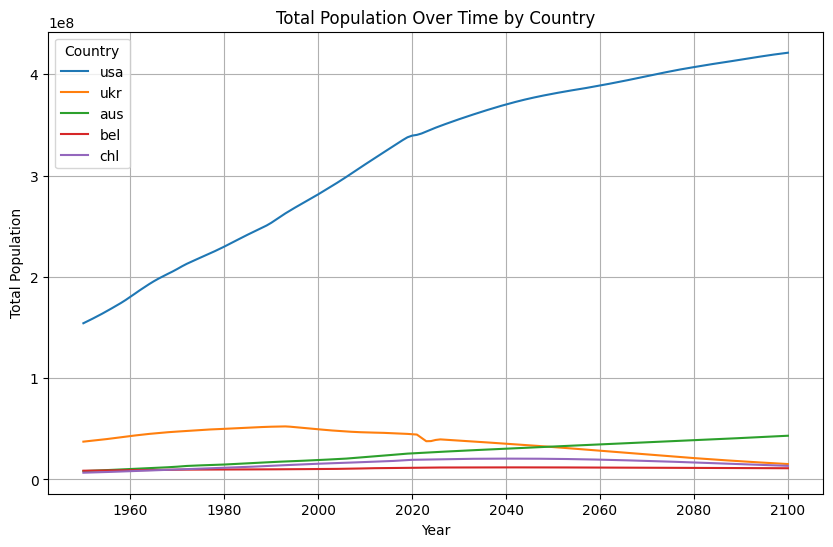

In [31]:
## Part 1: Matplotlib

#1. Create a line plot comparing total population over time:
#   - Choose 5 countries
#   - Calculate the total population by country for each year
#   - Create a line plot showing population trends
#   - Include a legend identifying each country
#   - Add appropriate axis labels and title
#   - Use different line styles or colors to distinguish the countries

#Define countries of interest
countries = ['usa', 'ukr', 'aus', 'bel', 'chl']  
data = {}

# use a loop to load the CSV file for the country selected
for country in countries:
  
    filename = f'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-{country}--age--gender--year.csv'
    
    if os.path.exists(filename):  # Check if the file exists before reading
        data[country] = pd.read_csv(filename)
    else:
        print(f"File not found: {filename}")

# Review the data from each country
for country, df in data.items():
    print(f"\nHead of the data for {country.lower()}:")
    print(df.tail())

# Select 5 countries for comparison
countries = ['usa', 'ukr', 'aus', 'bel', 'chl']  

# Prepare a dictionary to store total population by country and year
country_population_by_year = {}

# Loop through the selected countries to obtain data of interest
for country in countries:
    df = data[country]
    
    # Assuming 'year' and 'population' columns exist in the dataframe
    # Group by year and sum the population
    population_by_year = df.groupby('year')['population'].sum()
    
    # Store the result in the dictionary
    country_population_by_year[country] = population_by_year

# Plot the population trends
plt.figure(figsize=(10, 6))

# Loop through each country to plot its data
for country, population in country_population_by_year.items():
    plt.plot(population.index, population.values, label=country)

# Add title and axis labels
plt.title('Total Population Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Total Population')

# Add a legend to identify each country
plt.legend(title='Country')

# Display the plot
plt.grid(True)
plt.show()    

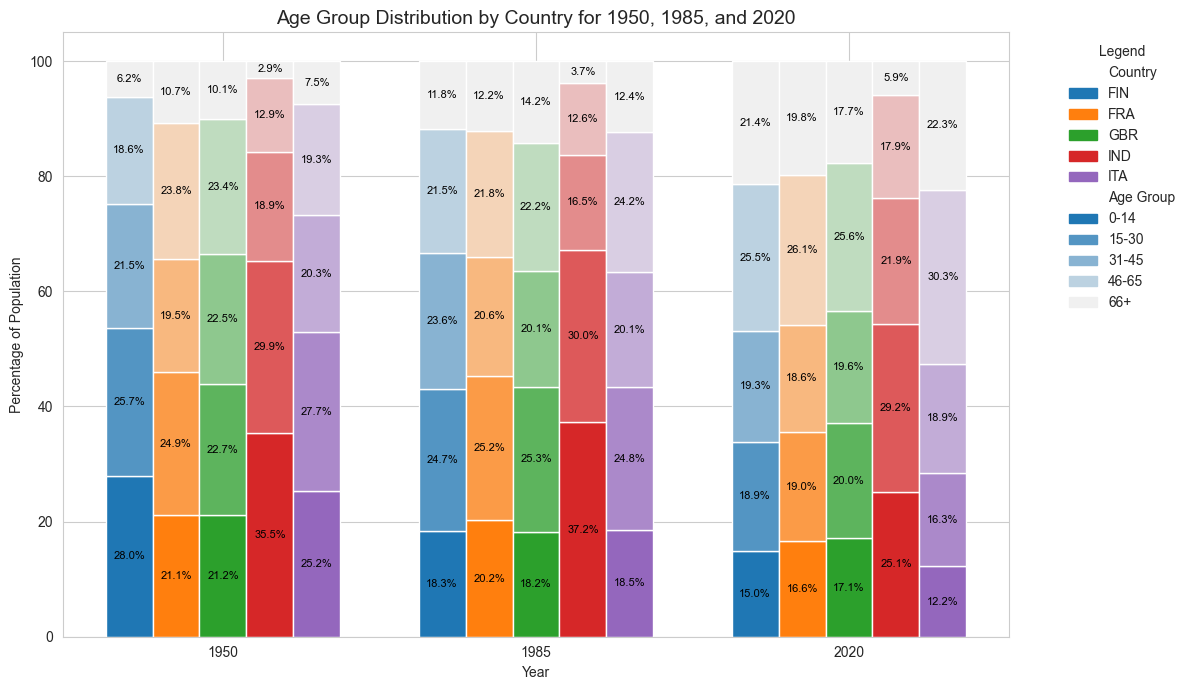

In [40]:
#2.Investigate demographic shifts using a stacked bar chart:

#   -Compare age distributions (0-14, 15-30, 31-45, 46-65, 66+) between 1950, 1985, and 2020
#   -Create a stacked bar chart showing these changes
#   -Calculate and display the percentage for each age group
#   -Add text annotations showing key percentages
#   -Include clear labels and a legend

# Define the countries and years of interest
countries = ['fin', 'fra', 'gbr', 'ind', 'ita']
years = [1950, 1985, 2020]
age_groups = ['0-14', '15-30', '31-45', '46-65', '66+']

# Load each country's data from CSV files into a dictionary
data = {}
for country in countries:
    filename = f'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-{country}--age--gender--year.csv'
    if os.path.exists(filename):  # Check if the file exists before reading
        data[country] = pd.read_csv(filename)
    else:
        print(f"File not found: {filename}")

# Combine all data into a single DataFrame
df = pd.concat(data.values(), ignore_index=True)

# Ensure 'age' is numeric and create age groups
df['age'] = pd.to_numeric(df['age'], errors='coerce')
bins = [0, 14, 30, 45, 65, 100]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=age_groups, right=True)

# Filter dataframe to years of interest
df = df[df['year'].isin(years)]

# create data dictionary to collect the percentage data for plotting
percentage_data = []

# Calculate age group distributions by country and year, added row with 0s if data is missing and filled missing group with 0s
for country in countries:
    for year in years:
        filtered_df = df[(df['country'] == country) & (df['year'] == year)]
        
        if filtered_df.empty:
            print(f"No data for {country} in {year}")
           
            percentage_data.append({
                'Country': country,
                'Year': year,
                '0-14': 0, '15-30': 0, '31-45': 0, '46-65': 0, '66+': 0
            })
            continue
        
        # Calculate the total and age group percentages
        age_group_totals = filtered_df.groupby('age_group', observed=True)['population'].sum()
        total_population = age_group_totals.sum()
        percentages = (age_group_totals / total_population) * 100
        percentages = percentages.reindex(age_groups, fill_value=0) 

        # Store the calculated percentages for each country and year
        percentage_data.append({
            'Country': country,
            'Year': year,
            **percentages.to_dict()
        })

# Create a DataFrame from the percentage data
plot_df = pd.DataFrame(percentage_data)

# Define base colors for each country
base_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  

# Generate color gradients for each country, will be used for age group
country_gradients = []
for base_color in base_colors:
    cmap = LinearSegmentedColormap.from_list("gradient", [base_color, "#f0f0f0"], N=len(age_groups))
    country_gradients.append([cmap(i / (len(age_groups) - 1)) for i in range(len(age_groups))])

# Plot the data
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.15  

for i, year in enumerate(years):
    for j in range(len(countries)):
        country = countries[j]
        row = plot_df[(plot_df['Country'] == country) & (plot_df['Year'] == year)]
        
        # Initialize bottom position for stacked bars
        bottoms = np.zeros(1)
        
        # Plot each age group with a gradient color for the selected base color
        for k, age_group in enumerate(age_groups):
            ax.bar(i + j * bar_width, row[age_group].values[0], width=bar_width,
                   bottom=bottoms, color=country_gradients[j][k], label=age_group if (i == 0 and j == 0) else "")
            # Update bottom for stacking
            bottoms += row[age_group].values

# Add title, labels, and legend
ax.set_title('Age Group Distribution by Country for 1950, 1985, and 2020', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Population')
ax.set_xticks([i + 2 * bar_width for i in range(len(years))])
ax.set_xticklabels(years)

# Specify legend for countries and age groups
country_patches = [Patch(color=base_colors[i], label=countries[i].upper()) for i in range(len(countries))]
age_group_patches = [Patch(color=country_gradients[0][k], label=age_groups[k]) for k in range(len(age_groups))]

# Create 'invisible' legend headers for Country and Age Group that will be combined below to have one legend
header_country = Patch(color='none', label='Country')
header_age_group = Patch(color='none', label='Age Group')

combined_legend = [header_country] + country_patches + [header_age_group] + age_group_patches
ax.legend(handles=combined_legend, title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# add percentage values for each age group
for i, year in enumerate(years):
    for j in range(len(countries)):
        country = countries[j]
        row = plot_df[(plot_df['Country'] == country) & (plot_df['Year'] == year)]
        cumulative = 0
        for k, age_group in enumerate(age_groups):
            value = row[age_group].values[0]
            if value > 0:
                cumulative += value
                ax.text(i + j * bar_width, cumulative - value / 2, f'{value:.1f}%', 
                        ha='center', va='center', fontsize=8, color='black')

# adjust layout for visibility, show plot
plt.tight_layout()
plt.show()


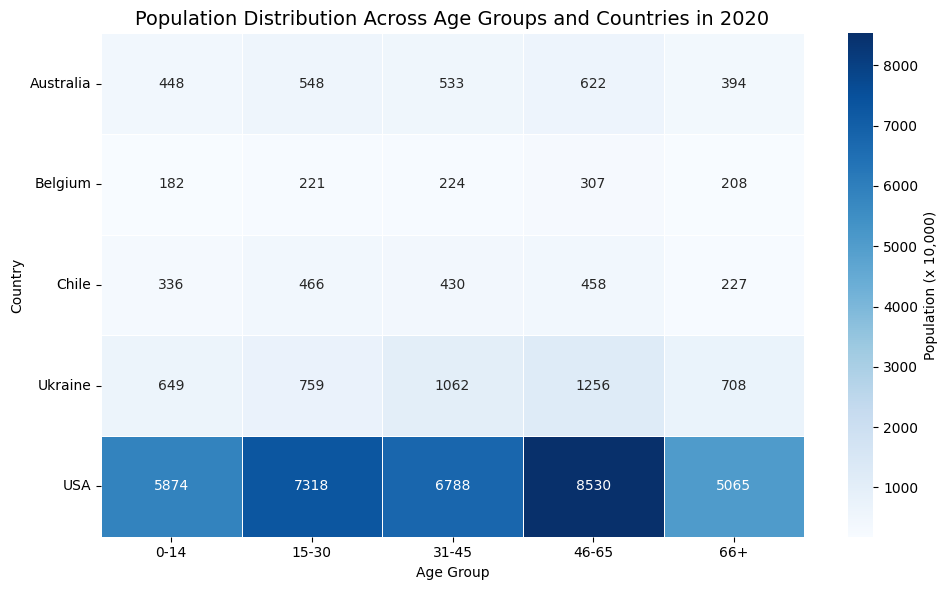

In [34]:
## Part 2: Seaborn
#1. Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and 
# country for 5 countries of your choice in a specific year.

# Define the specific year for which you want to visualize the data
year = 2020

# Create an empty DataFrame to store the population data for all countries
combined_data = pd.DataFrame()

# Loop through the countries and filter the data for the specific year
for country, df in data.items():
    # Filter the data for the selected year
    df_year = df[df['year'] == year].copy()  # .copy() ensures we are working on a copy
    
    # Create a new 'age_group' column by binning the ages using .loc[]
    df_year.loc[:, 'age_group'] = pd.cut(df_year['age'], bins=bins, labels=age_groups, right=True)
    
    # Add the country column to the DataFrame using .loc[]
    df_year.loc[:, 'country'] = country
    
    # Append the data to the combined_data DataFrame
    combined_data = pd.concat([combined_data, df_year])

# Group by country and age_group, summing the population for each group, with observed=False to suppress the warning
grouped_data = combined_data.groupby(['country', 'age_group'], observed=False)['population'].sum().unstack()

# Ensure all age groups are present in the data (fill missing values with 0)
grouped_data = grouped_data.reindex(columns=age_groups, fill_value=0)

# Scale down the population numbers by dividing by 10,000 (e.g., to represent 'per 10,000')
grouped_data_scaled = grouped_data / 10000

# Create a mapping of country codes to full names
country_labels = {
    'usa': 'USA',
    'ukr': 'Ukraine',
    'aus': 'Australia',
    'bel': 'Belgium',
    'chl': 'Chile'
}

# Get the current y-tick labels (country codes) and map them to full names
y_tick_labels = [country_labels.get(label, label) for label in grouped_data.index]



# Heatmap Analysis: Population Distribution Across Age Groups (2020)
The heatmap illustrates the relative population distribution across different age groups (0-14, 15-30, 31-45, 46-65, 66+) for the five selected countries (USA, Ukraine, Australia, Belgium, and Chile) in the year 2020.

## Key insights from the heatmap:
- Of the countries selected, USA has a higher proportion of individuals in all age group as highlighted by the darker cells. Within USA, there is a much larger proportion of individuals in 46-65 years old. 
- Similarly, the highest proportion of individuals in Ukraine is also in the 46-65 years old age group, but the proportion between different age group is not as drastic as that in USA.
- Interestingly, most countries beside USA and Ukraine have similar proportions between different age group suggestive of demographic stability. 

Overall, the heatmap is a nice way to visually compare demographic trends across selected countries. This graph can help highlight differences within a country and across countries.

Data loaded for USA:
   country  age  gender  year  population
0     usa    0       1  1950     1835785
1     usa    0       1  1951     1879034
2     usa    0       1  1952     1907822
3     usa    0       1  1953     1945242
4     usa    0       1  1954     1991504
Data loaded for FRA:
   country  age  gender  year  population
0     fra    0       1  1950      430224
1     fra    0       1  1951      433450
2     fra    0       1  1952      433292
3     fra    0       1  1953      432380
4     fra    0       1  1954      432188

Filtered data for USA in 2020:
     country  age  gender
70      usa    0       1
221     usa    0       2
372     usa    1       1
523     usa    1       2
674     usa   10       1

Filtered data for FRA in 2020:
     country  age  gender
70      fra    0       1
221     fra    0       2
372     fra    1       1
523     fra    1       2
674     fra   10       1

Combined DataFrame (first 10 rows):
   country  age  gender
0     usa    0       1
1     usa    0

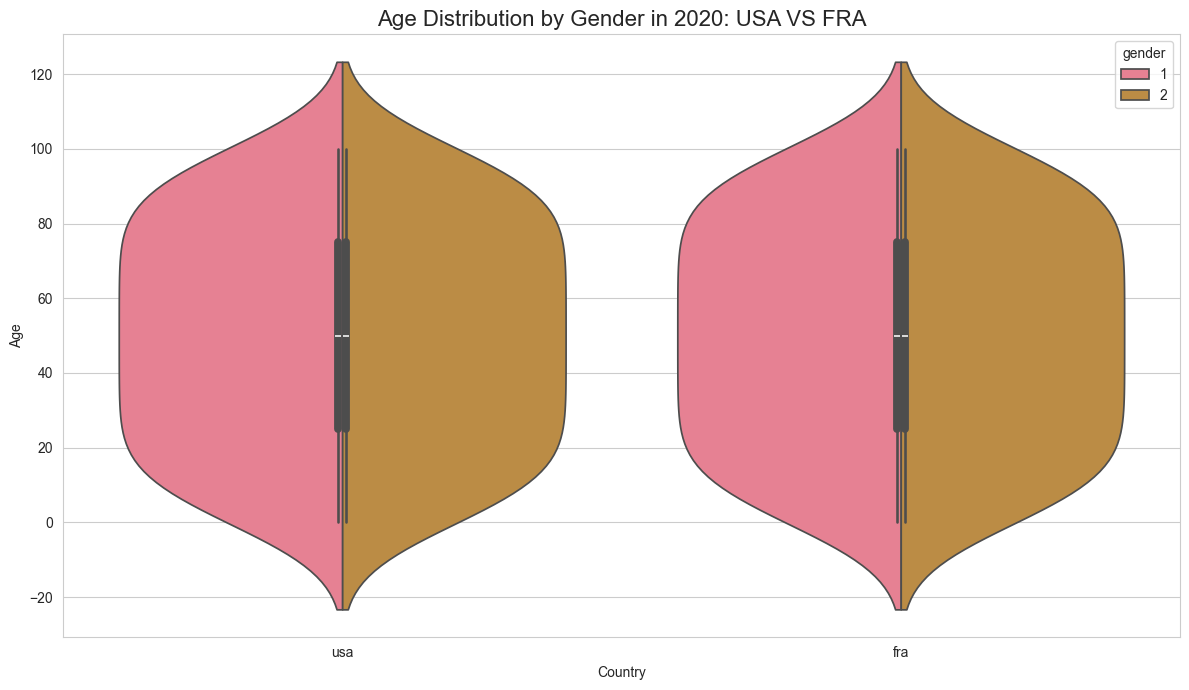

In [60]:
#2. Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.

# Specified the countries to compare
countries = ['usa', 'fra']  
data = {}

# Load data for each country from the CSV files
for country in countries:
    filename = f'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-{country}--age--gender--year.csv'
    if os.path.exists(filename):  # Check if the file exists before reading
        df = pd.read_csv(filename)
        data[country] = df
        print(f"Data loaded for {country.upper()}:\n", df.head())  # Print data to verify it is loaded correctly
    else:
        print(f"File not found: {filename}")

# Specify style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 8)  

# Define year of interest, combine data for the countries selected
year = 2020
df_comparison = pd.DataFrame()

# filter data for the selected year and add country labels
for country, df in data.items():
    if 'year' in df.columns and 'age' in df.columns and 'gender' in df.columns:
        # Filter for the selected year
        df_year = df[df['year'] == year].copy()
        # Add country label
        df_year['country'] = country  
        # Append to the main DataFrame
        df_comparison = pd.concat([df_comparison, df_year], ignore_index=True)
        # Print data to verify separation by country
        print(f"\nFiltered data for {country.upper()} in {year}:\n", df_year[['country', 'age', 'gender']].head())
    else:
        print(f"Missing columns in data for {country}")

# Print the data to make sure both countries are represented in the combined DataFrame
print("\nCombined DataFrame (first 10 rows):\n", df_comparison[['country', 'age', 'gender']].head(10))
print("\nUnique countries in the combined DataFrame:", df_comparison['country'].unique())

# create the violin plot, separated by gender and colored by country
plt.figure(figsize=(12, 7))
sns.violinplot(x='country', y='age', hue='gender', data=df_comparison, split=True, palette=palette[:2])

# add title/labels, show plot
title_countries = " vs ".join(countries).upper()
plt.title(f'Age Distribution by Gender in 2020: {title_countries}', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


# Comparison of Age Distributions by Gender in 2020: USA vs. France
The violin plots show the age distribution for males and females in the USA and France in 2020. There do not appear to be any difference between both countries.

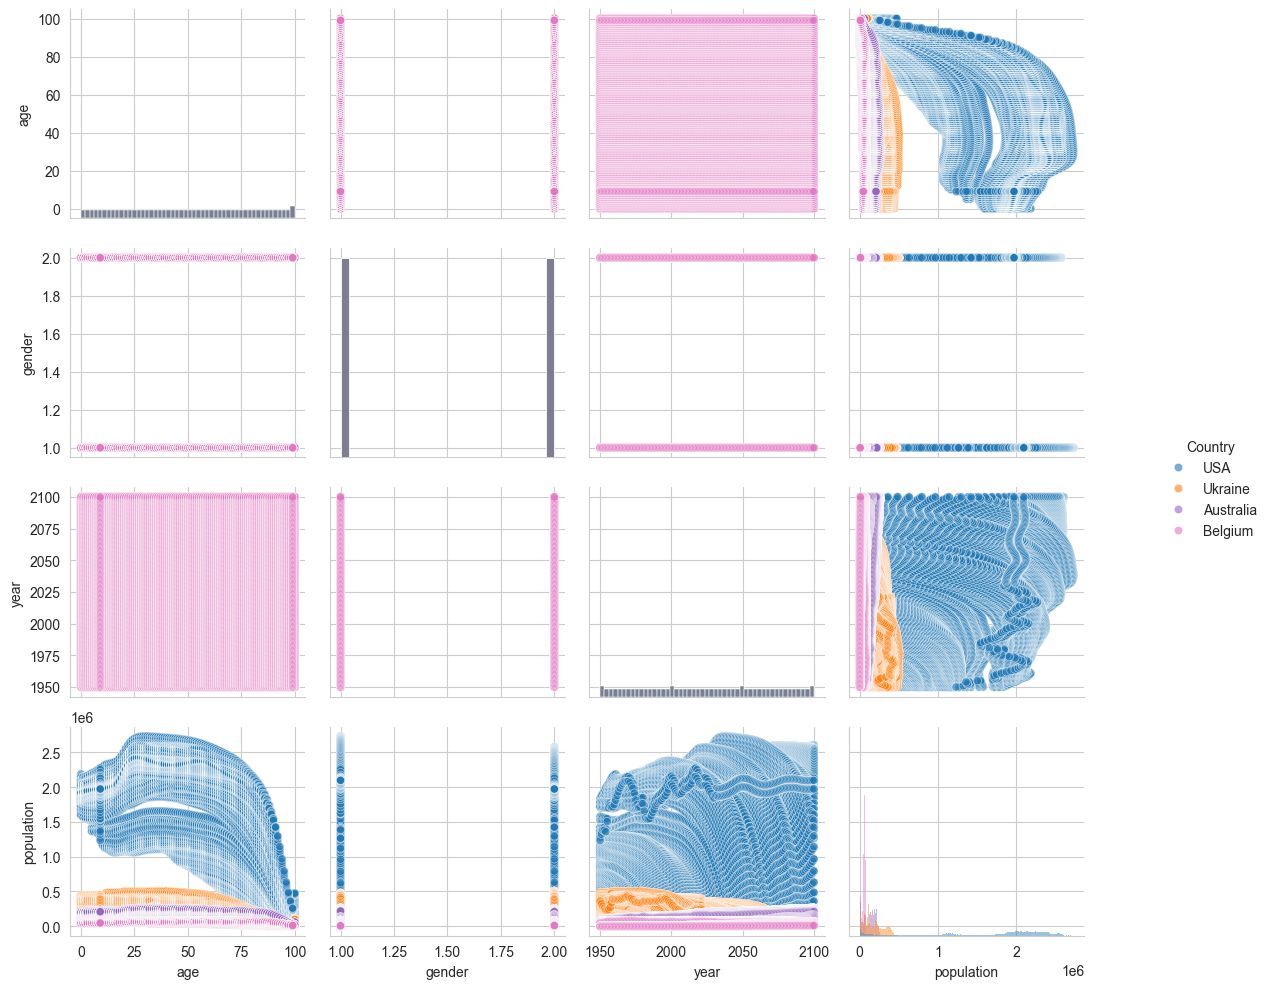

In [56]:
#3. Create a pairplot comparing population metrics across four countries:
#   - Select four countries of your choice
#   - Include all variables in the dataset
#   - Use the country as the hue parameter to distinguish between countries
#   - Write a brief summary of any patterns or relationships revealed by the pairplot

# Define the countries you want to compare
countries = ['usa', 'ukr', 'aus', 'bel']  
data = {}

# Load data for each country from the CSV files
for country in countries:
    filename = f'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-{country}--age--gender--year.csv'
    
    # Check if the file exists before reading
    if os.path.exists(filename):  
        data[country] = pd.read_csv(filename)
    else:
        print(f"File not found: {filename}")

# Set the Seaborn style before plotting
sns.set_style("whitegrid")

# Combine data for the selected countries
df_comparison = pd.concat([df.assign(country=country) for country, df in data.items() if country in countries])

# Mapping dictionary for full country names
country_labels = {
    'usa': 'USA',
    'ukr': 'Ukraine',
    'aus': 'Australia',
    'bel': 'Belgium'
}

# Map the full country names to the 'country' column
df_comparison['country'] = df_comparison['country'].map(country_labels)

# Define an updated color palette with high-contrast colors
palette = sns.color_palette(['#1f77b4', '#ff7f0e', '#9467bd', '#e377c2'])  # Blue, orange, purple, pink

# Create the pairplot with transparency and histogram option
pairplot = sns.pairplot(df_comparison, hue='country', diag_kind='hist', palette=palette, plot_kws={'alpha': 0.6})

# Adjust legend placement and add title to the legend
pairplot._legend.set_bbox_to_anchor((1.15, 0.5))  
pairplot._legend.set_title("Country")

# Show the plot with tight layout
plt.tight_layout()
plt.show()


# Summary of Patterns and Relationships in Population Metrics Across USA, Ukraine, Australia, and Belgium
The pairplot shown above helps to visualize the relationship among population metrics for the selected countries, which are USA, Ukraine, Australia, and Belgium in this example and represented by different colors. The different colors for each country allows us to easily compare and spot any outliers or overlapping trends. The diagonal histograms are meant to show the distribution of each variable for each country, but is hard to visualize despite increasing transparency. Some notable differences highlighted by this pair plot include:

## 1. Population and Age
The scatter plots display how age and population metrics relate to each other within each country. You can appreciate more population in USA (blue) compared to other countries and larger spread within each age group while other countries have smaller spread for each age.

## 2. Population and Year
Interestingly, USA shows growth of population with increasing year. Ukraine had higher population in 1950 compared to 2000 and continues to decrease in the projected year (e.g., 2100).

In [ ]:
## Part 3: Open-ended, not required

#Create a visualization using streamlit
#Build an interactive dashboard that lets users:
#- Select 2-3 countries from a dropdown menu
#- View their total populations over time as a line chart
#- Show a data table with key statistics
#- Add filters for specific years or age groups

#This visualization works best in a browser and not in jupyter, to run the code: streamlit run streamlit.py